# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn  as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv",encoding = 'latin1')

### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


<Axes: xlabel='Country'>

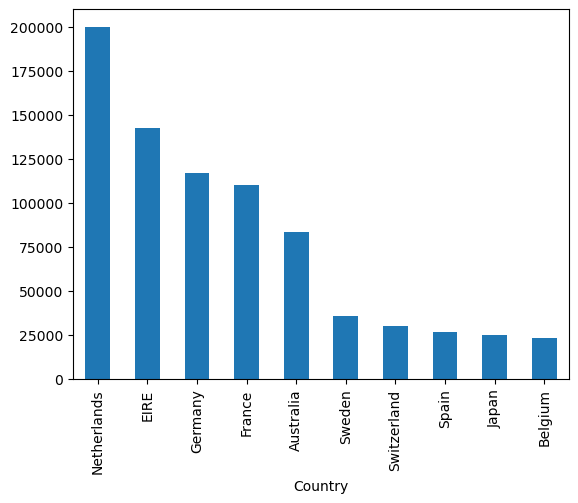

In [4]:
df.groupby("Country")["Quantity"].sum().sort_values(ascending = False)[1:11].plot(kind = "bar")

### Step 5.  Exclude negative Quantity entries

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df=df[~df["Quantity"]<0]

In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531283.000000,531283.000000,397924.000000
mean,10.655299,3.898954,15294.315171
std,156.830617,35.876279,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [19]:
df=df.drop(df[df["UnitPrice"]<1].index)

In [23]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/11 12:50,4.15,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [50]:
top3 = ["Netherlands","EIRE","Germany"]

In [51]:
customers =df[df["Country"].isin(top3)].groupby(["CustomerID","Country"]).sum()
customers['Country'] = customers.index.get_level_values(1)

In [52]:
customers

,,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,Country,,,,,,,
12426.0,Germany,5549855549855549855549855549855549855549855549...,2066520963225512255422555224142236522366217472...,RED RETROSPOT PURSE APPLE BATH SPONGEPLASTERS ...,221,5/29/11 12:265/29/11 12:265/29/11 12:265/29/11...,117.14,Germany
12427.0,Germany,5368615368615368615368615368615368615368615368...,221492207721249226362263422301223002132821329P...,FELTCRAFT 6 FLOWER FRIENDS6 RIBBONS RUSTIC CHA...,245,12/3/10 10:4412/3/10 10:4412/3/10 10:4412/3/10...,142.05,Germany
12468.0,Germany,5423715423715423715423715423715423715423715555...,229572250422898225542255662018POST223312243122...,SET 3 PAPER VINTAGE CHICK PAPER EGGCABIN BAG V...,228,1/27/11 13:291/27/11 13:291/27/11 13:291/27/11...,128.30,Germany
12471.0,Germany,5381745381745381745381745381745381745381745381...,2121021578217312123222077223262242322472224452...,SET OF 72 RETROSPOT PAPER DOILIESWOODLAND DES...,4979,12/10/10 9:3512/10/10 9:3512/10/10 9:3512/10/1...,1899.08,Germany
12472.0,Germany,5372015372015372015372015372015372015372015372...,2278122865229602296122964229722297322975229762...,GUMBALL MAGAZINE RACKHAND WARMER OWL DESIGNJAM...,2463,12/5/10 14:1912/5/10 14:1912/5/10 14:1912/5/10...,747.28,Germany
...,...,...,...,...,...,...,...,...
14016.0,EIRE,5394215394215394215394215394215394215394215394...,2296022961221132291422929229662296922768216092...,JAM MAKING SET WITH JARSJAM MAKING SET PRINTED...,1067,12/17/10 14:2112/17/10 14:2112/17/10 14:2112/1...,607.75,EIRE
14156.0,EIRE,5412205412205412205412205412205412205412205412...,225052296822362223632236185049G212892293122932...,MEMO BOARD COTTAGE DESIGNROSE COTTAGE KEEPSAKE...,38115,1/14/11 14:111/14/11 14:111/14/11 14:111/14/11...,5224.04,EIRE
14335.0,Germany,5654305654305654305654305654305654305654305654...,2190822637218922262021890217152267322371223722...,CHOCOLATE THIS WAY METAL SIGNPIGGY BANK RETROS...,124,9/4/11 13:079/4/11 13:079/4/11 13:079/4/11 13:...,134.60,Germany


C:\Users\IAmAlight\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


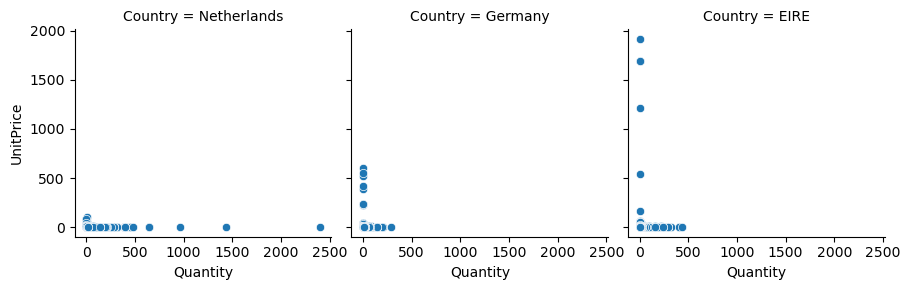

In [65]:
top_countries = df[df.Country.isin(top3)]

figure = sns.FacetGrid(top_countries, col="Country")
figure.map(sns.scatterplot, "Quantity", "UnitPrice")

figure.add_legend()
plt.show()

In [58]:
top_countries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385,536403,22867,HAND WARMER BIRD DESIGN,96,12/1/10 11:27,1.85,12791.0,Netherlands
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.0,Netherlands
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/10 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/10 13:04,2.55,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/10 13:04,1.65,12662.0,Germany
...,...,...,...,...,...,...,...,...
541799,581578,22080,RIBBON REEL POLKADOTS,10,12/9/11 12:16,1.65,12713.0,Germany
541800,581578,23298,SPOTTY BUNTING,9,12/9/11 12:16,4.95,12713.0,Germany
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/11 12:16,1.25,12713.0,Germany
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/11 12:16,2.08,12713.0,Germany


### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [64]:
customers.head()

,,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,Country,,,,,,,
12426.0,Germany,5549855549855549855549855549855549855549855549...,2066520963225512255422555224142236522366217472...,RED RETROSPOT PURSE APPLE BATH SPONGEPLASTERS ...,221,5/29/11 12:265/29/11 12:265/29/11 12:265/29/11...,117.14,Germany
12427.0,Germany,5368615368615368615368615368615368615368615368...,221492207721249226362263422301223002132821329P...,FELTCRAFT 6 FLOWER FRIENDS6 RIBBONS RUSTIC CHA...,245,12/3/10 10:4412/3/10 10:4412/3/10 10:4412/3/10...,142.05,Germany
12468.0,Germany,5423715423715423715423715423715423715423715555...,229572250422898225542255662018POST223312243122...,SET 3 PAPER VINTAGE CHICK PAPER EGGCABIN BAG V...,228,1/27/11 13:291/27/11 13:291/27/11 13:291/27/11...,128.30,Germany
12471.0,Germany,5381745381745381745381745381745381745381745381...,2121021578217312123222077223262242322472224452...,SET OF 72 RETROSPOT PAPER DOILIESWOODLAND DES...,4979,12/10/10 9:3512/10/10 9:3512/10/10 9:3512/10/1...,1899.08,Germany
12472.0,Germany,5372015372015372015372015372015372015372015372...,2278122865229602296122964229722297322975229762...,GUMBALL MAGAZINE RACKHAND WARMER OWL DESIGNJAM...,2463,12/5/10 14:1912/5/10 14:1912/5/10 14:1912/5/10...,747.28,Germany


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [66]:
top_countries.UnitPrice.dtype

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [67]:
df[df["CustomerID"] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [68]:
df[df["CustomerID"] == 12347.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535005,581180,23552,BICYCLE PUNCTURE REPAIR KIT,6,12/7/11 15:52,2.08,12347.0,Iceland
535006,581180,21064,BOOM BOX SPEAKER BOYS,24,12/7/11 15:52,1.25,12347.0,Iceland
535008,581180,21731,RED TOADSTOOL LED NIGHT LIGHT,24,12/7/11 15:52,1.65,12347.0,Iceland
535009,581180,23084,RABBIT NIGHT LIGHT,24,12/7/11 15:52,1.79,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [69]:
df.groupby("Country")["Quantity"].sum().sort_values(ascending = False)[0:4]

Country
United Kingdom    2915836
Netherlands        127083
EIRE                87390
Germany             72068
Name: Quantity, dtype: int64

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [70]:
df["Revenue"] = df["Quantity"]*df["UnitPrice"]

In [71]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [72]:
g = df.groupby(["CustomerID","Country"])[["Revenue","Quantity"]].sum()
g["AvgPrice"] = g["Revenue"]/g["Quantity"]
g["Country"] = g.index.get_level_values(1)

In [73]:
p=g[g["Country"].isin(top3)].sort_index(level=1)

##### Step 7.3.3 Plot

C:\Users\IAmAlight\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


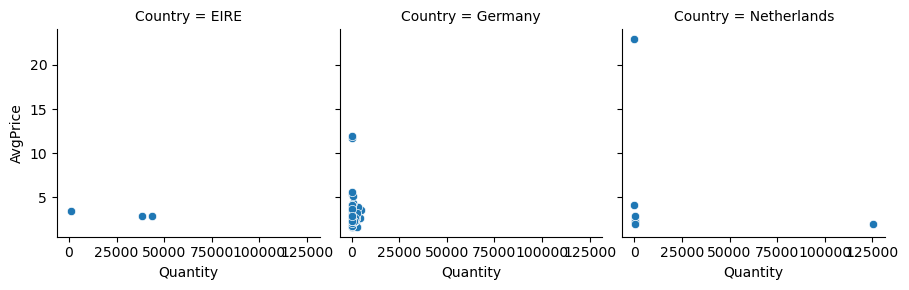

In [75]:

figure = sns.FacetGrid(p, col="Country")
figure.map(sns.scatterplot, "Quantity", "AvgPrice", alpha=1)

figure.add_legend()
plt.show()

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

<Axes: xlabel='AvgPrice', ylabel='Quantity'>

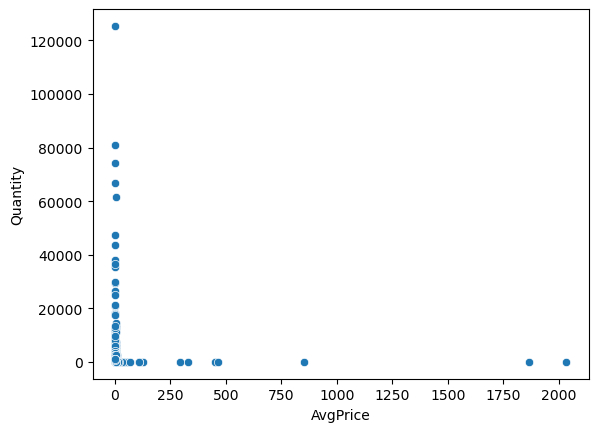

In [76]:

sns.scatterplot(data=g,x="AvgPrice",y="Quantity")

##### Step 7.4.2 Zoom in so we can see that curve more clearly

(-1.0, 80.0)

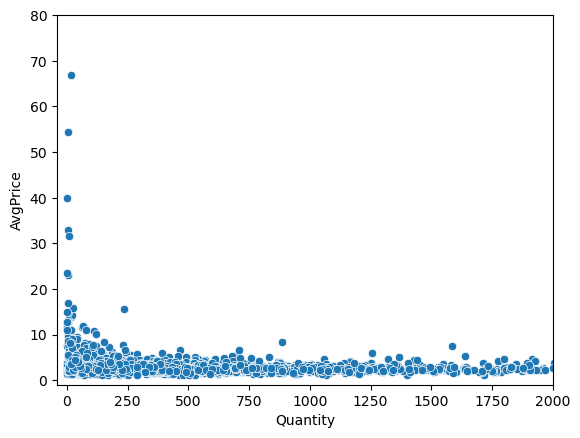

In [78]:

sns.scatterplot(data=g,y="AvgPrice",x="Quantity")
plt.xlim(-40,2000) 
plt.ylim(-1,80)


### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [79]:
price_range= np.arange(0,50,1)

In [80]:
revenue_unitprice = pd.cut(df.UnitPrice,price_range)

In [89]:
ax = df.groupby(revenue_unitprice)[["Quantity","Revenue"]].sum()

#### 8.3 Plot.

<Axes: xlabel='UnitPrice'>

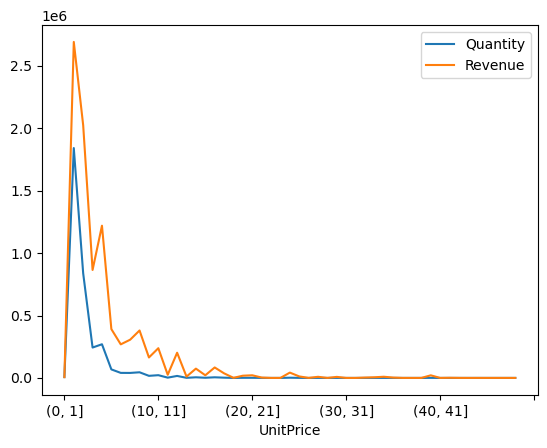

In [90]:
ax.plot()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

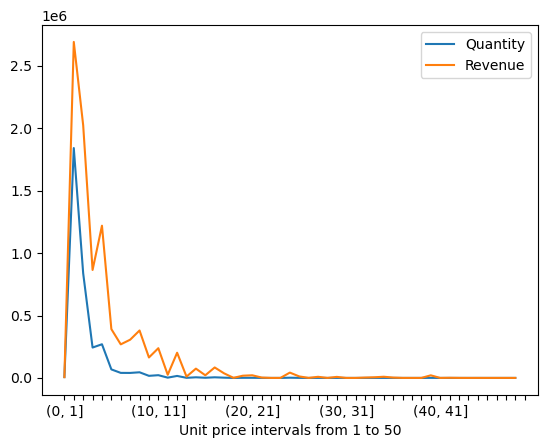

In [95]:
ax.plot()
plt.xlabel("Unit price intervals from 1 to 50")
plt.xticks(price_range)
plt.show()

### BONUS: Create your own question and answer it.